In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Set up the NetworkX graph
G = nx.Graph()

In [5]:
# read edge list
edges = pd.read_pickle('data/subreddit_edges.pkl')

In [7]:

# edges = edges[['from', 'subreddit']]
edges = edges.rename(columns={'from': 'source', 'subreddit': 'target'})
# reset index
edges = edges.reset_index(drop=True)

<AxesSubplot:>

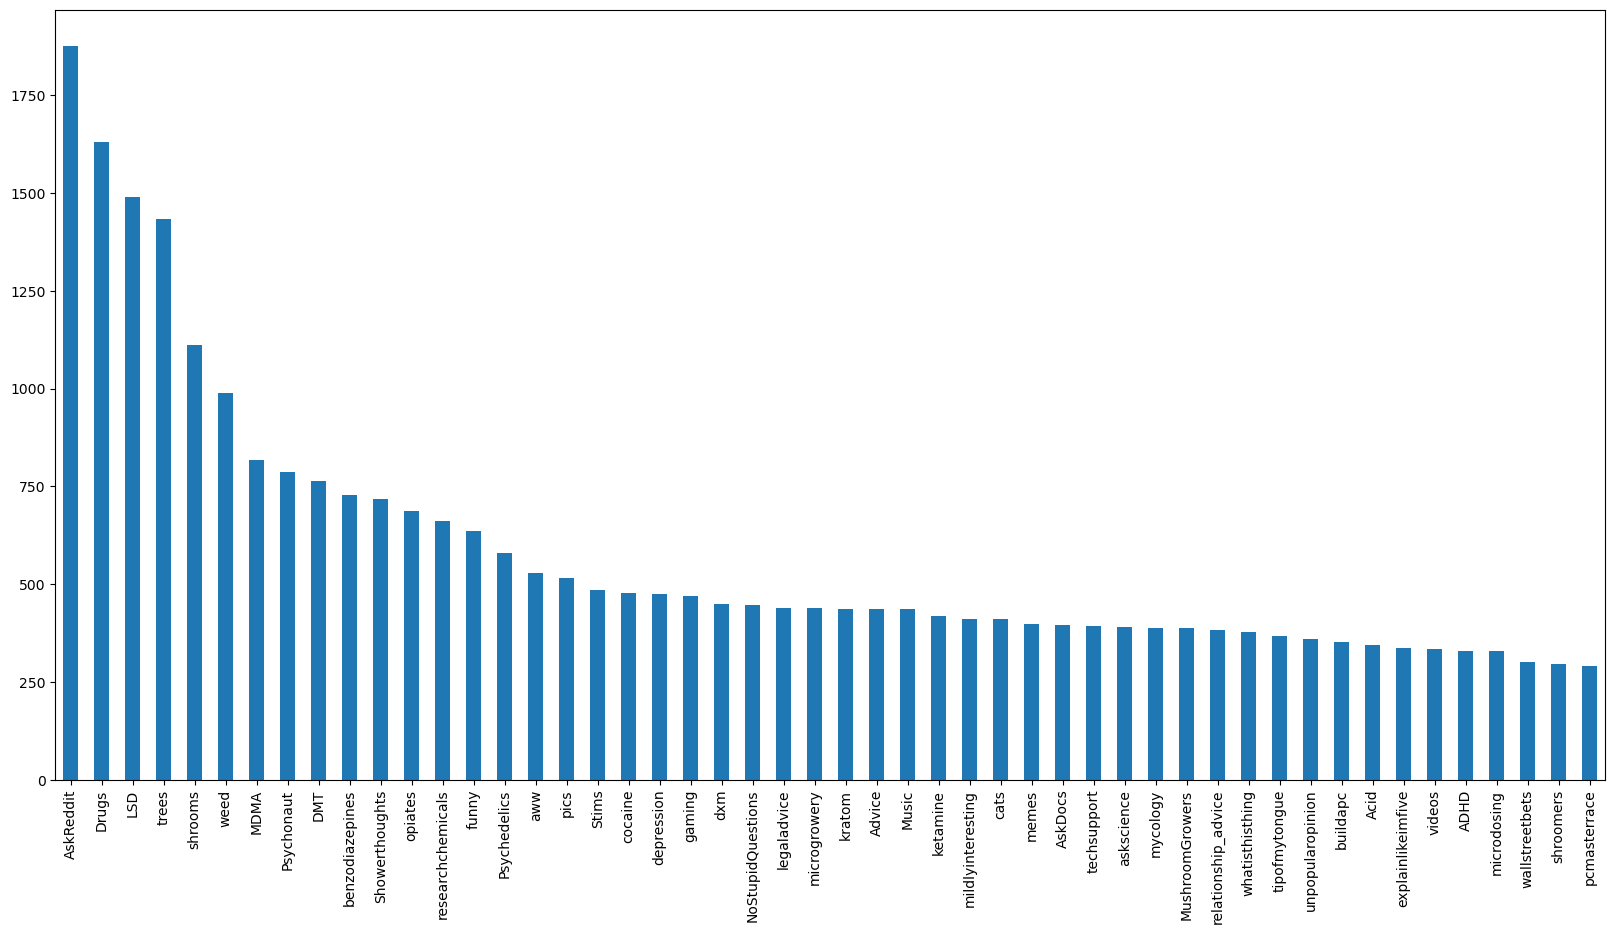

In [4]:
edges['target'].value_counts().head(50).plot(kind='bar', figsize=(20,10))

In [6]:
author_list = edges['name'].unique()

---

## network stats

In [44]:
g = nx.from_pandas_edgelist(edges, source='source', target='target', create_using=nx.DiGraph())

In [45]:
print(nx.info(g))

DiGraph with 23624 nodes and 69347 edges


/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_54743/1432719896.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(g))


In [46]:
# degree centrality
deg_cen = nx.degree_centrality(g)
deg_cen = pd.DataFrame.from_dict(deg_cen, orient='index')
deg_cen.columns = ['degree_centrality']

print(deg_cen.sort_values(by='degree_centrality', ascending=False).head(10))

                 degree_centrality
LSD                       0.507937
shrooms                   0.498116
Drugs                     0.437159
Psychedelics              0.264742
opiates                   0.253947
MDMA                      0.248444
benzodiazepines           0.189476
cocaine                   0.183804
Autoflowers               0.152309
ambien                    0.102400


The degree centrality for a node v is the fraction of nodes it is connected to. It is used to determine what nodes are most connected. Here we can see the maximum Degree of centrality is of `LSD` (0.51), which means that most of the nodes are connected to the `LSD` subreddit and then to `shrooms` (0.49).

In [13]:
# closeness centrality
close_cen = nx.closeness_centrality(g)
close_cen = pd.DataFrame.from_dict(close_cen, orient='index')
close_cen.columns = ['closeness_centrality']

print(close_cen.sort_values(by='closeness_centrality', ascending=False).head(10))

                   closeness_centrality
AskHistorians                  0.000466
dogecoin                       0.000466
buildapcforme                  0.000466
golf                           0.000466
DippingTobacco                 0.000466
FortNiteBR                     0.000466
StonerEngineering              0.000466
borderlands3                   0.000466
memes                          0.000466
ComedyCemetery                 0.000466


Closeness centrality measures the mean distance from one node to any other node. The more central a node is, the closer it is to all the other nodes. We see that, oddly, node `AskHistorians` has the highest closeness centrality, which means that it is closest to the most nodes than all the other nodes.

In [14]:
# betweenness centrality
bet_cen = nx.betweenness_centrality(g)
bet_cen = pd.DataFrame.from_dict(bet_cen, orient='index')
bet_cen.columns = ['betweenness_centrality']

print(bet_cen.sort_values(by='betweenness_centrality', ascending=False).head(10))


                 betweenness_centrality
shrooms                        0.000077
LSD                            0.000076
Drugs                          0.000048
Psychedelics                   0.000029
opiates                        0.000024
MDMA                           0.000023
cocaine                        0.000019
Autoflowers                    0.000016
benzodiazepines                0.000016
cannabis                       0.000011


Betweenness Centrality, Measures the number of shortest paths that the node lies on. This centrality is usually used to determine the flow of information through the graph.

In [15]:
# eigenvector centrality
eig_cen = nx.eigenvector_centrality(g)
eig_cen = pd.DataFrame.from_dict(eig_cen, orient='index')
eig_cen.columns = ['eigenvector_centrality']

print(eig_cen.sort_values(by='eigenvector_centrality', ascending=False).head(10))

              eigenvector_centrality
MacMiller                   0.018197
audiophile                  0.018197
pokemon                     0.018197
web_design                  0.018197
Cigarettes                  0.018197
DotA2                       0.018197
Coffee                      0.018197
FortNiteBR                  0.018197
meme                        0.018197
spirituality                0.018197


Eigenvector Centrality, Measures the node’s relative influence in the network, or how well a node is connected to other highly connected nodes. From this, we can say that our top 3 nodes can be MacMiller, audiophile, pokemon.

In [16]:
# write
nx.write_gexf(g, 'data/subreddit_network.gexf')

In [ ]:
# connections not in drug list
drug_subs = ['LSD', 'stims', 'opiates', 'cocaine', 'benzodiazepines', 'shrooms', 'ambien', 'Autoflowers', 'cannabis', 'Drugs', 'MDMA', 'Psychedelics']

In [50]:
# add weights to edges
# weight is the number of users shared between two subreddits
# get the counts of each unique subreddit pair
edge_counts = edges.groupby(['source', 'target']).size().reset_index(name='weight')

# add edge weights to graph
for index, row in edge_counts.iterrows():
    g[row['source']][row['target']]['weight'] = row['weight']

# get the top 10 most connected subreddits
edge_counts.sort_values(by='weight', ascending=False).head(10)

,source,target,weight
14433,LSD,AskReddit,485
15703,LSD,Drugs,402
6309,Drugs,LSD,402
58093,shrooms,AskReddit,399
24515,LSD,shrooms,397
60710,shrooms,LSD,397
4068,Drugs,AskReddit,355
25156,LSD,trees,354
13331,Drugs,trees,304
68639,shrooms,trees,290


In [51]:
g.get_edge_data('LSD', 'benzodiazepines')

{'weight': 95}

reduce network

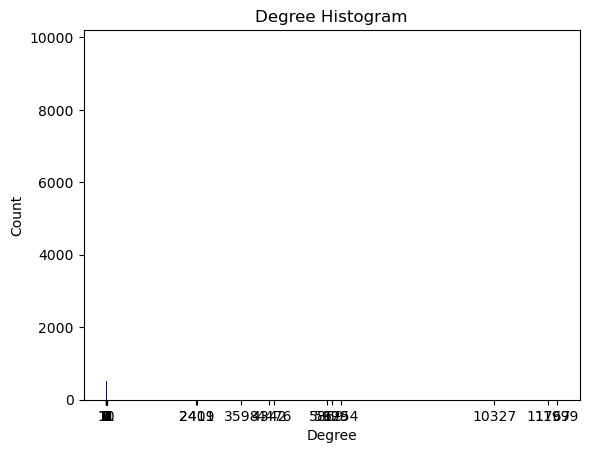

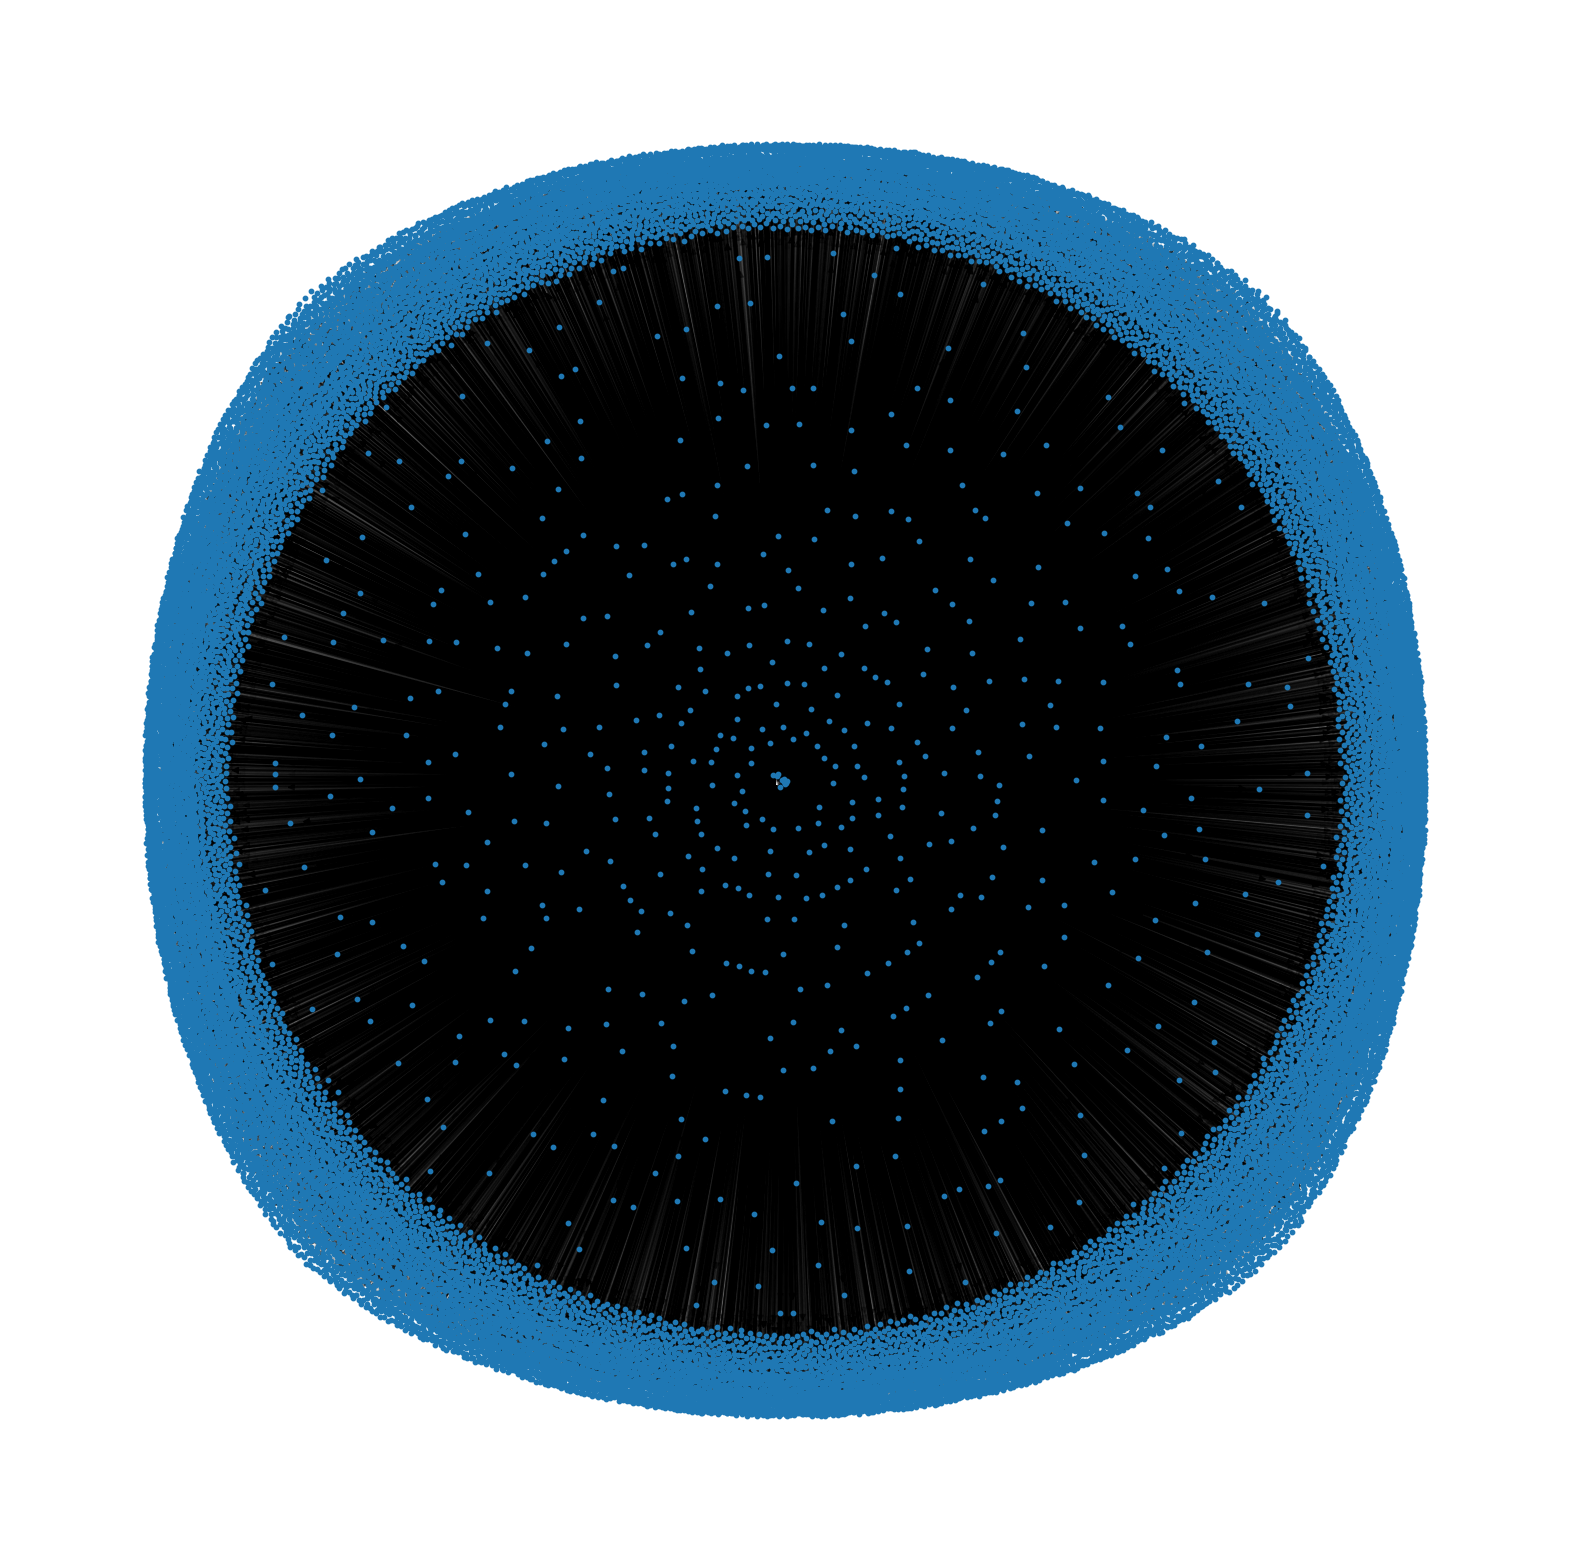

In [27]:
from collections import Counter
# plot degree distribution
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph
plt.figure(figsize=(20,20))
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=10)
nx.draw_networkx_edges(g, pos, alpha=0.1)
plt.axis('off')
plt.show()


In [31]:
# five num summary of degree
degree = pd.DataFrame.from_dict(dict(g.degree()), orient='index')
degree.columns = ['degree']
degree.describe()


,degree
count,23624.000000
mean,5.870894
std,154.188408
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,11999.000000


---
## network reduction

In [ ]:
TR = nx.transitive_reduction(g)
TR.add_nodes_from(g.nodes(data=True))
TR.add_edges_from((u, v, g.edges[u, v]) for u, v in TR.edges)

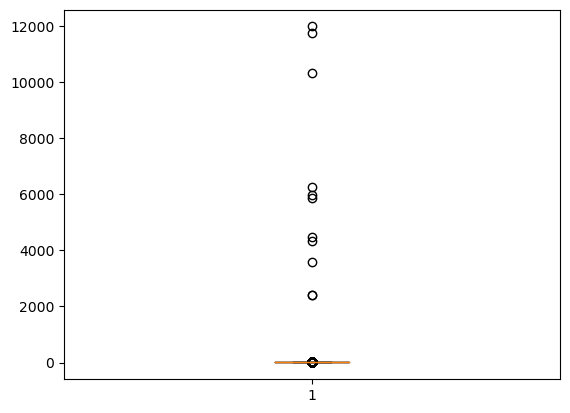

In [34]:
# create scatter plot of degree distribution
plt.boxplot(degree['degree'])
plt.show()

In [36]:
# reduce graph to nodes with at least 1 degree
g_red = g.subgraph([n for n, d in g.degree() if d > 1])

https://medium.com/web-mining-is688-spring-2021/how-influencers-on-reddit-form-a-network-of-related-subreddits-30884134c137

In [ ]:
print(nx.info(G_trim2))
print('Density:', nx.density(G_trim2))

In [ ]:
# plot graph
nx.draw(G_trim2, with_labels=True)
plt.show()